# Ames Housing - Kaggle Competition

# Table of Contents

### 1. Introduction
### 2. Data Analysis & Visualizations
### 3. Top Three Actionable Insights
### ------------------------------------
### Code
### Bibliography


# 1. Introduction


For home buyers, there are many aspects that affect the decision to find their perfect home. Factors such as location, condition, pricing, amenities, size or layout, and style play a role in the decision-making process when purchasing a property.

This report will include the analysis and how the data was prepared before moving on to feature engineering and the model-building process. A combination of data analysis and common knowledge was used to identify the best way to improve the final sale prices. In addition, it was necessary to detect what would need to be improved and which factors have the most significant effect on the pricing of a home. The methodology that was used for predictive modeling was the testing of various models to find out which one would work best.

# 2. Data Analysis & Visualizations

## Correlation

/var/folders/qz/ybh3b7qd43l25ff6626czkvm0000gn/T/ipykernel_21409/1587512929.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing_train.corr()


<AxesSubplot: >

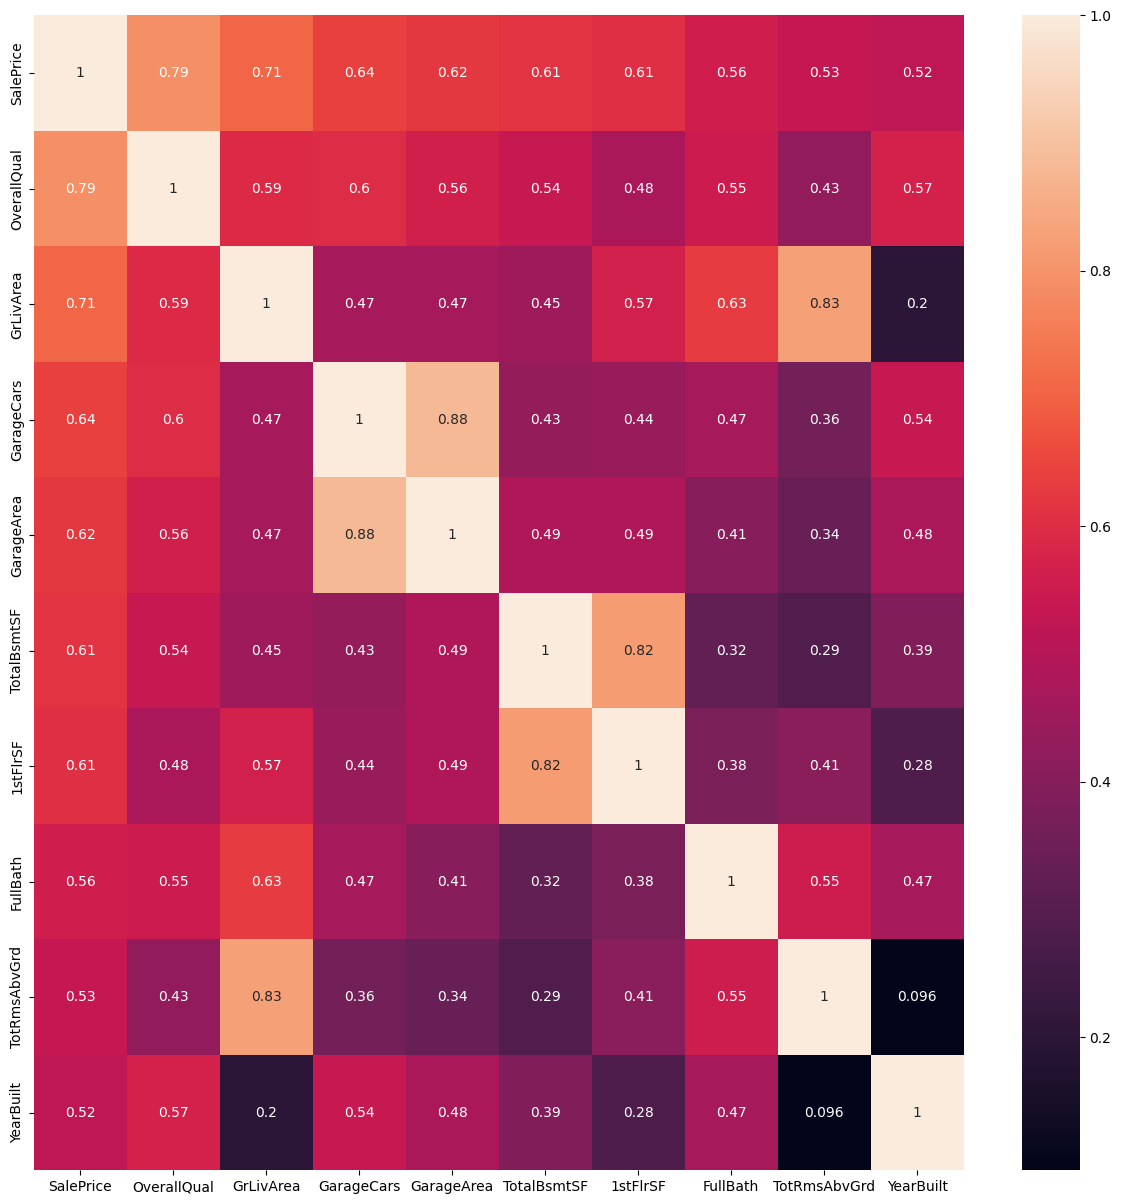

In [37]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
training_dataset = "train.csv"
housing_train    = pd.read_csv(training_dataset)
corr = housing_train.corr()

corr_cols = corr['SalePrice'].sort_values(ascending = False).head(10).index
corr_SalePrice = housing_train[corr_cols].corr()

plt.subplots(figsize = (15, 15))
sns.heatmap(corr_SalePrice, annot = True)

The top ten attributes that have high interaction with the sales price are displayed on the heatmap. The strength and direction of the relationship are shown on the heatmap using a color scale. It can be observed that the overall quality, followed by the living area in square feet and the size of the garage in car capacity, has the most significant positive link with the sales price. On the other hand, values like the square feet of the basement, the half bathroom in a basement, and the value of miscellaneous features had the most significant negative relationship with sales price.
 

## Misssing values

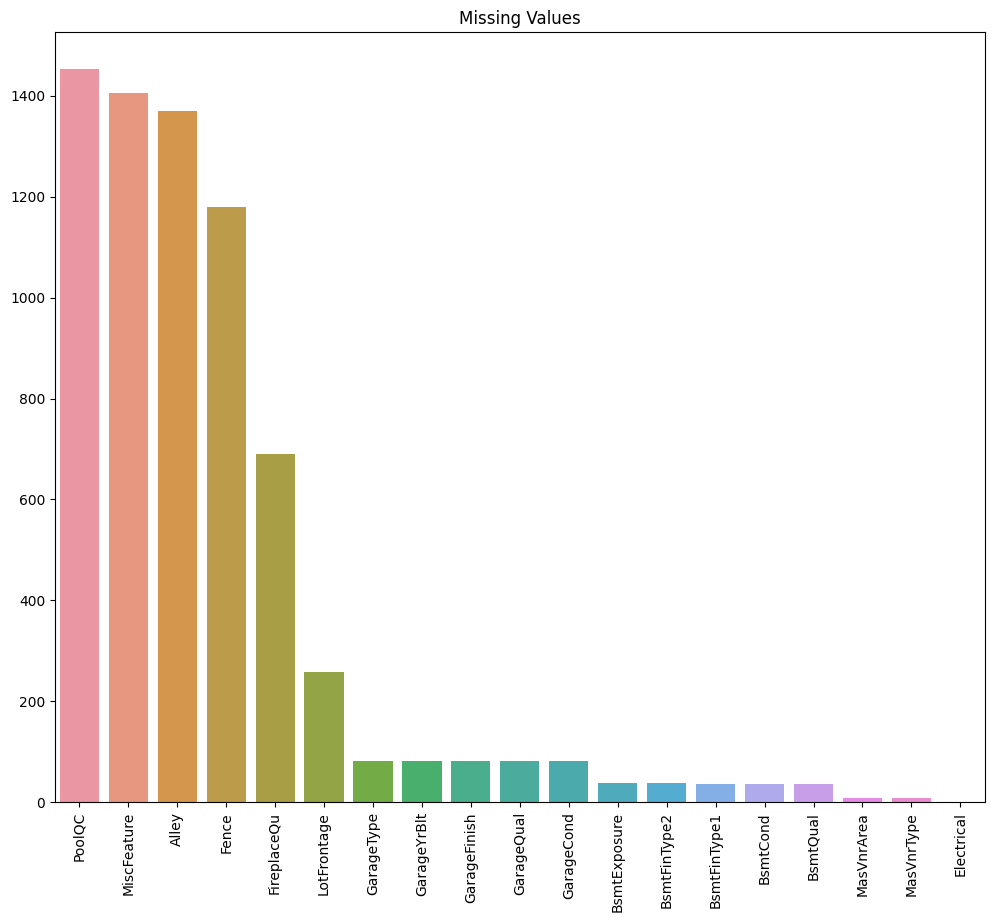

In [38]:
missing_values = housing_train.isnull().sum()
missing_values = missing_values[missing_values>0].sort_values(ascending=False)

plt.figure(figsize=(12,10))
sns.barplot(x=missing_values.index, y=missing_values)
plt.xticks(rotation=90)
plt.title('Missing Values')
plt.show()

The feature with the highest missing values is the pool quality, followed by miscellaneous feature which is not covered in other categories, alley, fence, and fireplace quality. Before undertaking any analysis or modeling, the visualization can assist in pinpointing the features that need to be rectified for missing values. Based on the number of missing values, it might also help prioritize which features to concentrate on—for instance, deleting features with a lot of missing data or assigning missing values to features with a few missing values. Additionally, this visualization look could be useful to understand patterns or connections between other elements and missing values. For example, it could also be discovered that the missing values for pool quality and pool area are connected or that the missing values for garage year build and garage type are connected. The optimum imputation approach for the lost values can be decided using this information.

The graph illustrates the association between overall quality and the sales price. As displayed in this graph, properties tend to sell at a higher price when their overall quality is higher, and this relationship is roughly linear. Also, the scatter plot reveals some outliers where homes with a high overall quality have a lower sales price than anticipated.
The scatter plot can show the interaction between the three variables. The data indicates that as the living area in square feet increases, the sales price tends to grow, and the effect is more substantial for houses with a higher overall quality. However, some outliers can be observed where homes with a larger living area and high overall quality have a lower sales price than expected.

The scatter plot also depicts the correlation between the sales price and the number of garage car capacity. This indicates that houses sell for a higher price when their garages are more prominent, and the relationship is essentially linear. For buildings with the same quantity of garage car capacity, there is some difference in the sales price.

Data also shows that houses with larger basements tend to have a higher sales price, and the relationship is approximately linear. However, there is some variation in the sales price for homes with the same total basement square feet.

Overall, it is clear to see how sales prices get impacted by these elements, and it also helps to see the outliers for each feature.

## Neighborhoods

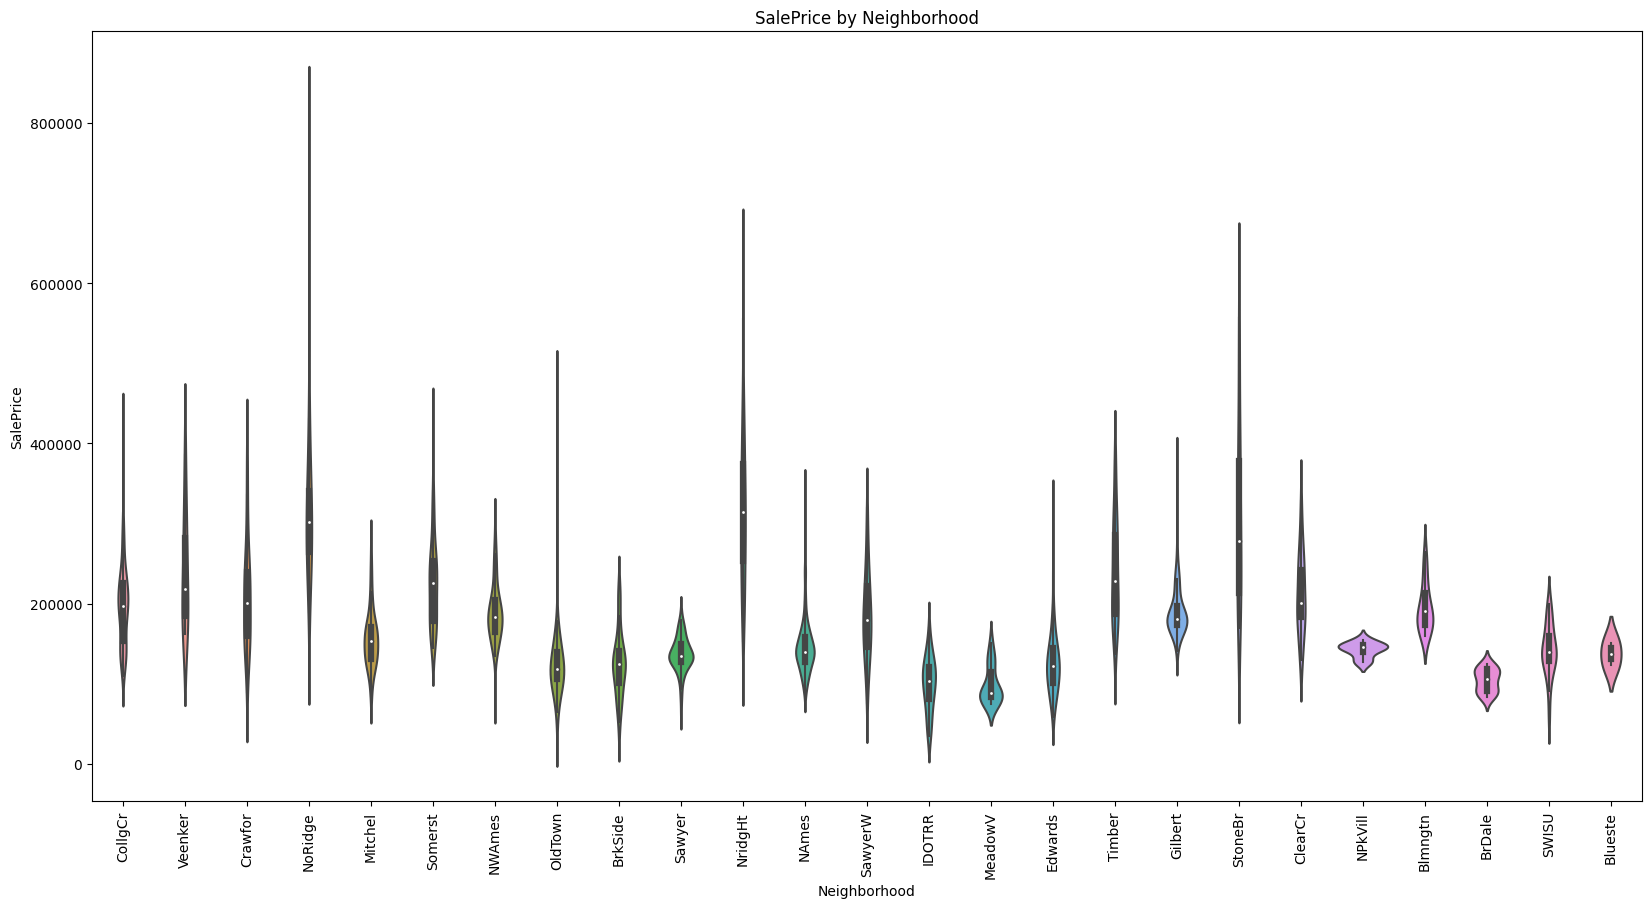

In [40]:

plt.figure(figsize=(20,10))
sns.violinplot(x='Neighborhood', y='SalePrice', data=housing_train)
plt.title('SalePrice by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.xticks(rotation=90)
plt.show()

The resulting violin graph shows the distribution of the sales price in each neighborhood. It is obvious that certain neighborhoods like 'NoRidge', 'NridgHt' and 'StoneBr' have higher average sales prices than other neighborhoods. Furthermore, neighborhoods have a wider sales price distribution than others. Overall, the fiddle plot provides a useful visualization of the distribution of sales price by neighborhood that can help identify patterns or trends in the data.

## Scale of Sale Price

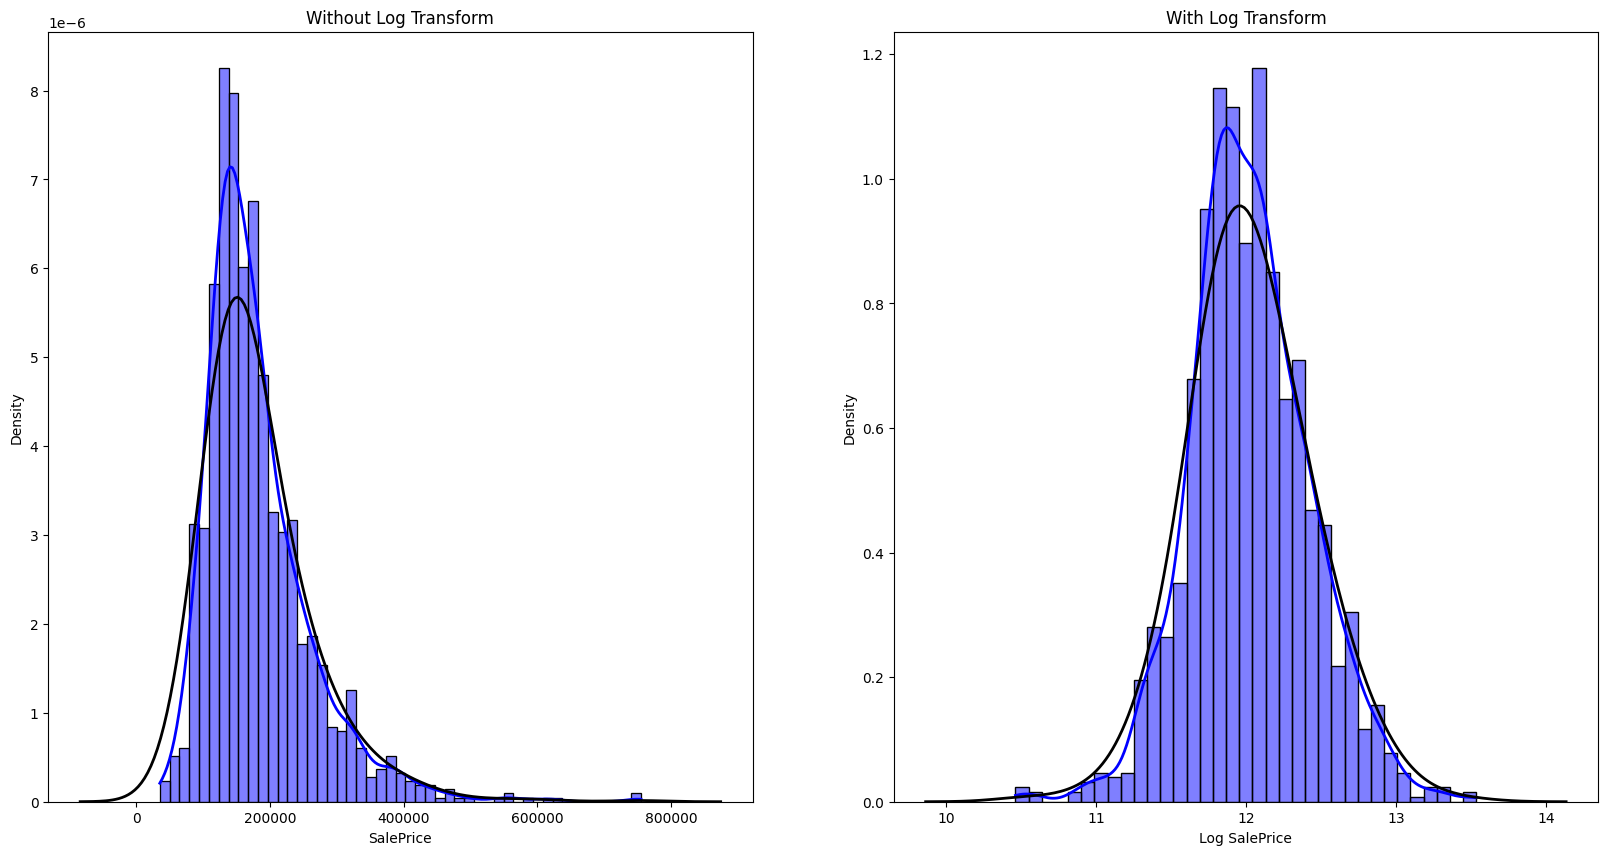

The first graph, which is skew and not in log, illustrates that the majority of sales prices fall within a tight range, with a few outliers at higher prices. This make it difficult to interpret the data and can make us mislead the real trends that affect the sales price of homes.

The second graph, which is log and normal, shows a more even distribution of sales prices across a large range of values, this distribution is better to interpret because it incorporates the size of the differences in a evenly distributed way improving the predictions of the model.

# 3. Top Three Actionable Insights


## Overall Quality

Based on the various models conducted, it was discovered that the overall quality feature has one of the most significant impacts on the sale price. In the current property market, the way the demand justifies the sale price has been based on the type of features a property has, such as a pool, porch area, etc. However, it is crucial to highlight that these features may be one of the marketing tools different real estate agencies utilize. The property's overall quality is still the dominant factor in impacting the sale price because buyers would want to purchase a house of good quality. This indicates to homeowners to maintain the quality of their property should they wish to sell it at a higher price. 

Based on the PwC report regarding trends in real estate in 2023, the real estate industry is moving beyond the current economic situation of rising interest rates, declining gross domestic product (GDP)  and sinking deal flows. There is still a positive trend in the real estate as investors are still looking into buying high-quality properties to accommodate to current trends such as workforce transformation, smarter cities projects, etc (PricewaterhouseCoopers, 2023).

## Garage Area 

The analysis also indicates that the size of the garage area plays a factor in impacting the property sale price as well. While most real estate marketing has been emphasizing additional aesthetic features such as balcony areas, porch areas, or fireplaces, the importance of storage availability needs to be addressed. Many homeowners see a garage not just as a place to park their cars but also as a place to store items and keep their houses neat. Instead of adding aesthetic features, homeowners could consider adding a garage or improving their garage space to increase their property's valuation and the sale price.

## Year Remodeled

Another impressive insight discovered was that remodeling properties have a positive impact on the sale price. Having the property remodeled could indicate that the property has been improved, which enhances and increases the quality of the property. Since the market has a significant emphasis on the property's quality, remodeling the property will increase the buyer’s willingness to pay a higher price for a property. Therefore, properties should be redone after a certain period to improve the quality of the home and possibly build features like a garage that matter to home buyers and can increase the sale price.

In particular, renovations and updates can increase the value of an older property' s attributes. 
Given the market a buyer is in and the worth of the current house, adding features or renovating will have a different effect. For instance, a finished basement in Portland is five times more valuable than one in Atlanta, representing an increase in median home value of around 13% versus 2.5%, respectively. 
A kitchen remodeling or the addition of a full bathroom, on the other hand, generally result in greater increases for less priced houses, though some projects, such as adding a pool, tend to have bigger increases for more expensive homes. (Gomez, 2022)


# Code

## Libraries

In [42]:
#!pip install catboost
#!pip install lightgbm
#!pip install sklearn
#!pip install xgboost

In [43]:
# # libraries
import os
import numpy                   as np
import pandas                  as pd
import scipy.stats

# # Visualizations
import matplotlib.pyplot       as plt # essential graphical output
import seaborn                 as sns # enhanced graphical output

# ML libraries
## SkLearn
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler # Scale features
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score

## ML Algorithms 
from sklearn.linear_model import BayesianRidge # Bayesian Ridge Regression model 
from sklearn.linear_model import Ridge #Ridge Regression model 
from sklearn.linear_model import OrthogonalMatchingPursuit #Orthogonal Matching Pursuit model 
from sklearn.linear_model import LinearRegression # Linear Regression Model
## Other ML libraries 
from catboost import CatBoostRegressor #CatBoost model
from lightgbm import LGBMRegressor # LightGBM model
import xgboost as xgb # XG Boost model


## Importing Data

In [44]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [45]:
# importing the training dataset
path             = ""
training_dataset = "train.csv"


# reading in the .csv file with pandas
housing_train    = pd.read_csv(filepath_or_buffer = path + training_dataset)

# importing the training dataset
path             = ""
testing_dataset  = 'test.csv'


# importing the testing dataset
housing_test = pd.read_csv(filepath_or_buffer = path + testing_dataset)


## Transformation

In [46]:
# Combine Train and Test Sets
target = housing_train['SalePrice']
test_ids = housing_test['Id']

# Drop ID and SalePrice column
housing_train_drop_id_sales = housing_train.drop(['Id', 'SalePrice'], axis=1)
housing_test_drop_id = housing_test.drop('Id', axis=1)

x_data = pd.concat([housing_train, housing_test], axis=0).reset_index(drop=True)

In [47]:
# Variables we want to drop
drop_var = ['Street',
'LandSlope',
'Alley',
'PoolQC',
'Fence',
'GarageQual',
'GarageCond',
'ExterCond',
'Heating',
'Condition2',
'RoofMatl',
'Electrical',
'LowQualFinSF',
#'KitchenAbvGr', #Decided not to drop and include in the feature engineering
'Functional',
'PavedDrive',
'Utilities',
'PoolArea',
'GarageYrBlt',
#'SalePrice', #Y variable
'MiscFeature' 
]


#### Train Data

In [48]:
def train_drop_var_train(housing_train):
    '''Dropping columns from the train data set.'''
    # Drop the columns from the dataframe
    housing_train_clean = housing_train.drop(columns=drop_var)
    return housing_train_clean

housing_train_clean_w_dropped_var_cols = train_drop_var_train(housing_train)


def train_fill_na(housing_train_clean_w_dropped_var_cols):
    '''Filling NaN values with the median or with NA in the training data set.'''
    housing_train_clean = housing_train_clean_w_dropped_var_cols
    cols_to_fillna = ['FireplaceQu', 'GarageFinish', 'GarageType', 
                  'SaleType', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'MSZoning', 
                  'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                  'BsmtFinType2']

    # replace NaN values in specified columns with "NA"
    housing_train_clean[cols_to_fillna] = housing_train_clean[cols_to_fillna].fillna('NA')


    cols_to_fillna_median = ['LotFrontage', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 
                         'BsmtUnfSF', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']

    # replace NaN values in specified columns with their median value
    housing_train_clean[cols_to_fillna_median] = housing_train_clean[cols_to_fillna_median].fillna(housing_train_clean[cols_to_fillna_median].median())
    housing_train_clean = housing_train_clean.reset_index(drop=True)  
    return housing_train_clean


housing_train_clean_w_fill_na = train_fill_na(housing_train_clean_w_dropped_var_cols)
# filter columns with null values
null_cols = housing_train_clean_w_fill_na.columns[housing_train_clean_w_fill_na.isnull().any()]
#print(null_cols)


#### Test Data

In [49]:
def test_drop_var_test(housing_test):
    '''Drop columns in test dataset. '''
    housing_test_clean = housing_test.drop(columns=drop_var)
    return housing_test_clean


housing_test_clean_w_dropped_var_cols = test_drop_var_test(housing_test)

def test_fill_na(housing_test_clean_w_dropped_var_cols):
    '''Fill NaN values with median or NA from test dataset'''
    housing_test_clean = housing_test_clean_w_dropped_var_cols

    cols_to_fillna = ['FireplaceQu', 'GarageFinish', 'GarageType', 
                  'SaleType', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'MSZoning', 
                  'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                  'BsmtFinType2']

    # replace NaN values in specified columns with "NA"
    housing_test_clean[cols_to_fillna] = housing_test_clean[cols_to_fillna].fillna('NA')


    cols_to_fillna_median = ['LotFrontage', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 
                         'BsmtUnfSF', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']

    # replace NaN values in specified columns with their median value
    housing_test_clean[cols_to_fillna_median] = housing_test_clean[cols_to_fillna_median].fillna(housing_test_clean[cols_to_fillna_median].median())
    housing_test_clean = housing_test_clean.reset_index(drop=True)
    return housing_test_clean


housing_test_clean_w_fill_na = test_fill_na(housing_test_clean_w_dropped_var_cols)


## Create Dummies

In [50]:
## Dummies for training dataset
# creating dummy variables
train_categorical_col = housing_train_clean_w_fill_na.select_dtypes(include=['object', 'category']).columns.tolist()
train_dummies = pd.get_dummies(housing_train_clean_w_fill_na[train_categorical_col])

# concatenating with original dataframe
housing_train_clean = pd.concat([housing_train_clean_w_fill_na, train_dummies], axis=1)

# dropping original columns
housing_train_clean.drop(train_categorical_col, axis=1, inplace=True)

# filter columns with null values
null_cols = housing_train_clean.columns[housing_train_clean.isnull().any()]


In [51]:
## Dummies for test dataset

test_categorical_col = housing_test_clean_w_fill_na.select_dtypes(include=['object', 'category']).columns.tolist()
test_dummies = pd.get_dummies(housing_test_clean_w_fill_na[test_categorical_col])

# concatenating with original dataframe
housing_test_clean_w_cat_columns = pd.concat([housing_test_clean_w_fill_na, test_dummies], axis=1)

# dropping original columns
housing_test_clean_w_cat_columns.drop(test_categorical_col, axis=1, inplace=True)

# rename dataframe 
housing_test_clean = housing_test_clean_w_cat_columns
#print(housing_test_clean.info(verbose=True))

# filter columns with null values
null_cols = housing_test_clean.columns[housing_test_clean.isnull().any()]

## Select Variables

In [52]:
# List of variables
x_var = [

      # 'Id',# 50 worst importance 
       'MSSubClass',
       'LotFrontage',
       'LotArea',
       'OverallQual',
       'OverallCond',
       'YearBuilt',
       'YearRemodAdd',
       'MasVnrArea', 
       'BsmtFinSF1', 
       ##'BsmtFinSF2', # 25 worst importance 
       ##'BsmtUnfSF',  # 25 worst importance 
       'TotalBsmtSF',
       '1stFlrSF',
       '2ndFlrSF',
       'GrLivArea', 
       ##'BsmtFullBath', 
       ##'BsmtHalfBath', # 25 worst importance 
       #'FullBath', # group
       #'HalfBath', 
       ##'BedroomAbvGr', # 25 worst importance 
       'TotRmsAbvGrd', 
       'Fireplaces',
       'GarageCars',
       'GarageArea',
       ###'WoodDeckSF', # 50 worst importance 
       ###'OpenPorchSF',# 50 worst importance 
       ###'EnclosedPorch', # 25 worst importance 
       ###'3SsnPorch',
       ###'ScreenPorch',# 50 worst importance 
       'MiscVal',
       'MoSold',
       'YrSold',
       #'MSZoning_C (all)', 
       ###'MSZoning_FV',
       ###'MSZoning_RH',
       ###'MSZoning_RL', 
       ###'MSZoning_RM',
       #'LotShape_IR1', #we want to compare regular or not
       #'LotShape_IR2', #we want to compare regular or not
       #'LotShape_IR3',#we want to compare regular or not
       'LotShape_Reg', #we want to compare regular or not
       #'LandContour_Bnk',#Is Lvl or not?
       #'LandContour_HLS',#Is Lvl or not?
       #'LandContour_Low',# 50 worst importance 
       'LandContour_Lvl',
       'LotConfig_Corner',
       'LotConfig_CulDSac',
       'LotConfig_FR2',
       'LotConfig_FR3',
       #'LotConfig_Inside', #Remmoved to be the base for dummies category
       'Neighborhood_Blmngtn',
       'Neighborhood_Blueste',
       'Neighborhood_BrDale',  
       'Neighborhood_BrkSide', 
       'Neighborhood_ClearCr', 
       'Neighborhood_CollgCr', 
       'Neighborhood_Crawfor', 
       'Neighborhood_Edwards', 
       'Neighborhood_Gilbert', 
       'Neighborhood_IDOTRR', 
       'Neighborhood_MeadowV', 
       'Neighborhood_Mitchel', 
       'Neighborhood_NAmes', 
       'Neighborhood_NPkVill', 
       'Neighborhood_NWAmes', 
       'Neighborhood_NoRidge', 
       'Neighborhood_NridgHt', 
       'Neighborhood_OldTown', 
       'Neighborhood_SWISU', 
       'Neighborhood_Sawyer', 
       'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 
       'Neighborhood_StoneBr', 
       'Neighborhood_Timber', 
       #'Neighborhood_Veenker', #Remmoved to be the base for dummies category
       ################
       'Condition1_Artery', 
       #'Condition1_Feedr',  # 25 worst importance 
       #'Condition1_Norm', #off-site
       #'Condition1_PosA', #off-site  # 25 worst importance 
       #'Condition1_PosN', #North-south
       #'Condition1_RRAn', #North-south # 25 worst importance 
       #'Condition1_RRAe', #East-West
       #'Condition1_RRNe', #East-West
       #'Condition1_RRNn', 
       #'BldgType_1Fam', #grouped family
       #'BldgType_2fmCon',
       #'BldgType_Duplex', 
       #'BldgType_Twnhs',#grouped Town homes
       #'BldgType_TwnhsE',  
       ################
       'HouseStyle_1.5Fin', 
       'HouseStyle_1.5Unf', 
       'HouseStyle_1Story', 
       #'HouseStyle_2.5Fin', # Not in test
       #'HouseStyle_2.5Unf', 
       #'HouseStyle_2Story', 
       #'HouseStyle_SFoyer', 
       #'HouseStyle_SLvl', 
       ################
       'RoofStyle_Flat', 
       'RoofStyle_Gable',
       'RoofStyle_Gambrel', 
       'RoofStyle_Hip',
       'RoofStyle_Mansard', 
       #'RoofStyle_Shed', #Remmoved to be the base for dummies category
       ################
       #'Exterior1st_AsbShng', 
       #'Exterior1st_AsphShn', 
       #'Exterior1st_BrkComm',
       #'Exterior1st_BrkFace', 
       #'Exterior1st_CBlock',  # Not in test
       #'Exterior1st_CemntBd', 
       #'Exterior1st_HdBoard', 
       ##'Exterior1st_ImStucc',  # Not in test
       #'Exterior1st_MetalSd', 
       #'Exterior1st_Plywood', 
       #'Exterior1st_Stone', # Not in test
       #'Exterior1st_Stucco',
       #'Exterior1st_VinylSd', 
       #'Exterior1st_Wd Sdng', 
       #'Exterior1st_WdShing', 
       ################
       'Exterior2nd_AsbShng', 
       'Exterior2nd_AsphShn', 
       'Exterior2nd_Brk Cmn', 
       'Exterior2nd_BrkFace', 
       'Exterior2nd_CBlock', 
       'Exterior2nd_CmentBd', 
       'Exterior2nd_HdBoard', 
       'Exterior2nd_ImStucc', 
       'Exterior2nd_MetalSd', 
       #'Exterior2nd_Other', #Remmoved to be the base for dummies category
       'Exterior2nd_Plywood', 
       'Exterior2nd_Stone', 
       'Exterior2nd_Stucco', 
       'Exterior2nd_VinylSd', 
       'Exterior2nd_Wd Sdng', 
       #'Exterior2nd_Wd Shng', #Remmoved to be the base for dummies category
       ################
       #'MasVnrType_BrkCmn', 
       #'MasVnrType_BrkFace', 
       'MasVnrType_None', # 50 worst importance 
       #'MasVnrType_Stone', #Remmoved to be the base for dummies category
       ################
       'ExterQual_Ex',  
       'ExterQual_Fa',  
       'ExterQual_Gd',  
       #'ExterQual_TA', # Worst 50 importance  #Remmoved to be the base for dummies category
       ################
       'Foundation_BrkTil', 
       'Foundation_CBlock', 
       'Foundation_PConc', 
       'Foundation_Slab',
       'Foundation_Stone', 
       #'Foundation_Wood', #Remmoved to be the base for dummies category
       ################
       'BsmtQual_Ex',
       'BsmtQual_Fa',  
       'BsmtQual_Gd',  
       #'BsmtQual_NA', #Remmoved NA column
       #'BsmtQual_TA',#Remmoved to be the base for dummies category
       'BsmtCond_Fa', 
       'BsmtCond_Gd', 
       #'BsmtCond_NA', #Remmoved NA column
       'BsmtCond_Po', 
       #'BsmtCond_TA', #Remmoved to be the base for dummies category
       ################
       'BsmtExposure_Av', 
       'BsmtExposure_Gd', 
       'BsmtExposure_Mn', 
       #'BsmtExposure_NA', #Remmoved NA column
       #'BsmtExposure_No', #Remmoved to be the base for dummies category
       ################
       'BsmtFinType1_ALQ', 
       'BsmtFinType1_BLQ', 
       'BsmtFinType1_GLQ', 
       'BsmtFinType1_LwQ', 
       #'BsmtFinType1_NA', #Remmoved NA column
       'BsmtFinType1_Rec',   # 25 worst importance 
       #'BsmtFinType1_Unf', #Remmoved to be the base for dummies category
       'BsmtFinType2_ALQ', 
       'BsmtFinType2_BLQ', 
       'BsmtFinType2_GLQ', 
       'BsmtFinType2_LwQ', 
       #'BsmtFinType2_NA', #Remmoved NA column
       'BsmtFinType2_Rec', 
       #'BsmtFinType2_Unf', #Remmoved to be the base for dummies category
       ################
       'HeatingQC_Ex', 
       'HeatingQC_Fa', 
       'HeatingQC_Gd', 
       'HeatingQC_Po', 
       #'HeatingQC_TA', # 50 worst importance #Remmoved to be the base for dummies category
       'CentralAir_N', 
       #'CentralAir_Y',  # 25 worst importance v#Remmoved to be the base for dummies category
       ################
       'KitchenQual_Ex', 
       'KitchenQual_Fa', 
       'KitchenQual_Gd', 
       #'KitchenQual_TA', #Remmoved to be the base for dummies category
       ################
       #'FireplaceQu_Ex', 
       #'FireplaceQu_Fa',  # 25 worst importance 
       #'FireplaceQu_Gd',  # 25 worst importance 
       #'FireplaceQu_NA', #Remmoved NA column
       #'FireplaceQu_Po', 
       #'FireplaceQu_TA', 
       ################
       'GarageType_2Types',
       'GarageType_Attchd',
       'GarageType_Basment',
       'GarageType_BuiltIn',
       'GarageType_CarPort',
       'GarageType_Detchd',
       #'GarageType_NA',  #Remmoved NA column
       'GarageFinish_Fin', 
       #'GarageFinish_NA', #Remmoved NA column
       'GarageFinish_RFn', 
       #'GarageFinish_Unf', # 50 worst importance #Remmoved to be the base for dummies category
       ################
       'SaleType_COD', 
       'SaleType_CWD', 
       'SaleType_Con', 
       'SaleType_ConLD', 
       'SaleType_ConLI', 
       'SaleType_ConLw', 
       'SaleType_New', 
       'SaleType_Oth', 
       #'SaleType_WD',  #Remmoved to be the base for dummies category
       ################
       'SaleCondition_Abnorml', 
       'SaleCondition_AdjLand', 
       'SaleCondition_Alloca', 
       'SaleCondition_Family', 
       'SaleCondition_Normal', 
       #'SaleCondition_Partial', #Remmoved to be the base for dummies category
       ################
       #'MiscFeature_Gar2', #Removed to improve the model
       #'MiscFeature_Othr',  #Removed to improve the model
       #'MiscFeature_Shed',  #Removed to improve the model
       #'MiscFeature_TenC' #Removed to improve the model

         ]
# Number of features
#print(len(x_var))

## Feature Engineering

In [53]:
#1. Outdoor living space: combining the square footage
outdoor_sf_cols = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
housing_train_clean['OutdoorSF'] = housing_train_clean[outdoor_sf_cols].sum(axis=1)
housing_test_clean['OutdoorSF'] = housing_test_clean[outdoor_sf_cols].sum(axis=1)

#2. Group zoning by residential
zoning_residential_cols = ['MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM']
housing_train_clean['MSZoning_Residential'] = housing_train_clean[zoning_residential_cols].sum(axis=1)
housing_test_clean['MSZoning_Residential'] = housing_test_clean[zoning_residential_cols].sum(axis=1)

#3. Condition 1
condition1_offset_cols = ['Condition1_Norm', 'Condition1_PosA']
condition1_north_south_cols = ['Condition1_PosN', 'Condition1_RRAn']
condition1_east_west_cols = ['Condition1_RRAe', 'Condition1_RRNe']

housing_train_clean['condition1_offset'] = housing_train_clean[condition1_offset_cols].sum(axis=1)
housing_test_clean['condition1_offset'] = housing_test_clean[condition1_offset_cols].sum(axis=1)

housing_train_clean['condition1_north_south'] = housing_train_clean[condition1_north_south_cols].sum(axis=1)
housing_test_clean['condition1_north_south'] = housing_test_clean[condition1_north_south_cols].sum(axis=1)

housing_train_clean['condition1_east_west'] = housing_train_clean[condition1_east_west_cols].sum(axis=1)
housing_test_clean['condition1_east_west'] = housing_test_clean[condition1_east_west_cols].sum(axis=1)

#4. Building Types
condition1_fam_group_cols = ['BldgType_1Fam', 'BldgType_2fmCon']
condition1_twnhs_group_cols = ['BldgType_Twnhs', 'BldgType_TwnhsE']

housing_train_clean['condition1_fam_group'] = housing_train_clean[condition1_fam_group_cols].sum(axis=1)
housing_test_clean['condition1_fam_group'] = housing_test_clean[condition1_fam_group_cols].sum(axis=1)

housing_train_clean['condition1_twnhs_group'] = housing_train_clean[condition1_twnhs_group_cols].sum(axis=1)
housing_test_clean['condition1_twnhs_group'] = housing_test_clean[condition1_twnhs_group_cols].sum(axis=1)

#5 Have Bath
housing_train_clean['have_bath'] = (housing_train_clean['FullBath'] + (0.5 * housing_train_clean['HalfBath']) + housing_train_clean['BsmtFullBath'] + (0.5 * housing_train_clean['BsmtHalfBath']))
housing_test_clean['have_bath'] = (housing_test_clean['FullBath'] + (0.5 * housing_test_clean['HalfBath']) + housing_test_clean['BsmtFullBath'] + (0.5 * housing_test_clean['BsmtHalfBath']))

# 6. Regroup exterior materials
exterior_cols = ['Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_WdShing','Exterior1st_BrkComm',\
                  'Exterior1st_BrkFace', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_MetalSd',\
                      'Exterior1st_CemntBd', 'Exterior1st_HdBoard',  'Exterior1st_Stucco', 'Exterior1st_Plywood']

housing_train_clean['Exterior_AsbShng'] = housing_train_clean[exterior_cols[0:3]].sum(axis=1)
housing_test_clean['Exterior_AsbShng'] = housing_test_clean[exterior_cols[0:3]].sum(axis=1)

housing_train_clean['Exterior_Brk'] = housing_train_clean[exterior_cols[3:5]].sum(axis=1)
housing_test_clean['Exterior_Brk'] = housing_test_clean[exterior_cols[3:5]].sum(axis=1)

housing_train_clean['Exterior_siding'] = housing_train_clean[exterior_cols[5:8]].sum(axis=1)
housing_test_clean['Exterior_siding'] = housing_test_clean[exterior_cols[5:8]].sum(axis=1)

housing_train_clean['Exterior_board'] = housing_train_clean[exterior_cols[8:10]].sum(axis=1)
housing_test_clean['Exterior_board'] = housing_test_clean[exterior_cols[8:10]].sum(axis=1)

housing_train_clean['Exterior_Others'] = housing_train_clean[exterior_cols[10:12]].sum(axis=1)
housing_test_clean['Exterior_Others'] = housing_test_clean[exterior_cols[10:12]].sum(axis=1)

# 7. Regroup masonry veneer types
housing_train_clean['MasVnrTyp_group'] = housing_train_clean[['MasVnrType_BrkCmn', 'MasVnrType_BrkFace']].sum(axis=1)
housing_test_clean['MasVnrTyp_group'] = housing_test_clean[['MasVnrType_BrkCmn', 'MasVnrType_BrkFace']].sum(axis=1)

#8. Transform to log scale 
housing_train_clean['SalePrice_log'] = np.log(housing_train_clean['SalePrice'])

# 9. Lot Area 
lot_columns = ['LotFrontage', 'LotArea']
housing_train_clean['Total_Lot_Area'] = housing_train_clean[lot_columns].sum(axis=1)
housing_test_clean['Total_Lot_Area'] = housing_test_clean[lot_columns].sum(axis=1)
#10
room_cols = ["TotRmsAbvGrd", "FullBath", "HalfBath", "KitchenAbvGr"]
housing_train_clean["SqFtPerRoom"] = housing_train_clean["GrLivArea"] / housing_train_clean[room_cols].sum(axis=1)
housing_test_clean["SqFtPerRoom"] = housing_test_clean["GrLivArea"] / housing_test_clean[room_cols].sum(axis=1)

#11. Total Home Quality
housing_train_clean['Total_Home_Quality'] = housing_train_clean['OverallQual'] + housing_train_clean['OverallCond']
housing_test_clean['Total_Home_Quality'] = housing_test_clean['OverallQual'] + housing_test_clean['OverallCond']

#12. High Quality Squarefeet
housing_train_clean["HighQualSF"] = housing_train_clean["1stFlrSF"] + housing_train_clean["2ndFlrSF"]
housing_test_clean["HighQualSF"] = housing_test_clean["1stFlrSF"] + housing_test_clean["2ndFlrSF"]



In [54]:
# List of added features
feature_engineering = ['MSZoning_Residential','condition1_offset', \
    'condition1_north_south','condition1_east_west','condition1_fam_group','condition1_twnhs_group',\
        'have_bath', 'MasVnrTyp_group','SqFtPerRoom', 'Total_Home_Quality','HighQualSF',
        'Exterior_AsbShng', 'Exterior_Brk', 'Exterior_siding', 'Exterior_board', 'Exterior_Others',
        ]

# combine new list 
x_var_train = x_var + feature_engineering

# rename final dafarame
train_final = x_var_train

In [55]:
# Filter and name variables used in the training data
x_train = housing_train_clean.loc[:, train_final] #All dependent variables x in train dataframe
y_train = housing_train_clean.loc[:, 'SalePrice'] #Only the independent variable/target y in train dataframe

# Filter and name variables used in the test data
x_test = housing_test_clean.loc[:, train_final] #All dependent variables x in test dataframe

## Scaling

In [56]:
# Scale data 
scaler = StandardScaler()
scaler.fit(x_train)
# Transform train and test dataset
x_train = pd.DataFrame(scaler.transform(x_train), index=x_train.index, columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), index=x_test.index, columns=x_test.columns)

## Dependent variable Y (Target) Transformation

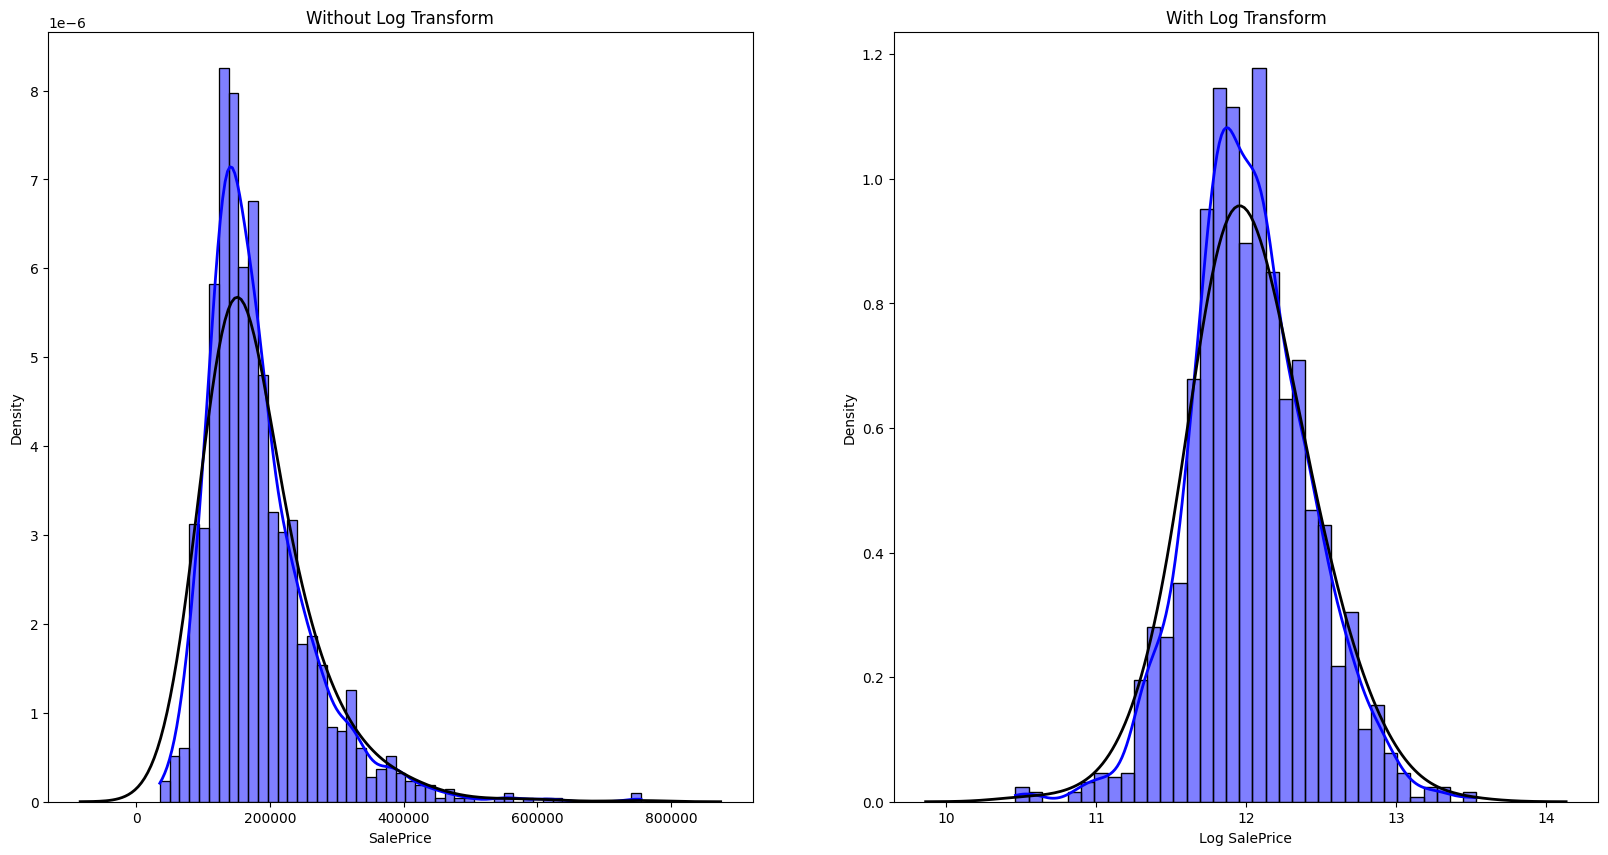

In [57]:
# apply log scale for dependent variable y
log_y_train = np.log(y_train)

# Target Transformation
plt.figure(figsize=(20, 10))
# Without Log Transform - skewed
plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True, stat="density", line_kws={'linewidth': 2}, alpha=0.5, color='b')
sns.kdeplot(y_train, lw=2, color='k', bw_method=0.5)
plt.title("Without Log Transform")

# With Log Transform - normal
plt.subplot(1, 2, 2)
sns.histplot(log_y_train, kde=True, stat="density", line_kws={'linewidth': 2}, alpha=0.5, color='b')
sns.kdeplot(log_y_train, lw=2, color='k', bw_method=0.5)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

# Plot histogram 
plt.show()


## Models

## Linear Regression

In [58]:
# Defining the machine learning model
linear_model = LinearRegression()

# Adjustment of train dataset to match test dataset
linear_x_train = x_train.iloc[:-1, :]
linear_log_y_train = log_y_train.iloc[:-1]

# Train the model
linear_model.fit(linear_x_train, linear_log_y_train)

# Predict
linear_y_pred = np.exp(linear_model.predict(x_test))

# Scoring (MSE, RMSE and R-squared)
mse = mean_squared_error(np.exp(linear_log_y_train), linear_y_pred) 
rmse = np.sqrt(mse) 
r2 = r2_score(np.exp(linear_log_y_train), linear_y_pred)

lin_rmse = rmse
lin_r2 = r2
#print(f"R-squared: {r2:.5f}")
#print(f"RMSE: {rmse:.5f}")

# Make Submission
linear_submission = pd.concat([test_ids, pd.Series(linear_y_pred, name='SalePrice')], axis=1)
#print(linear_submission)

# Export Submission
linear_submission.to_csv('./linear_submission.csv', index=False, header=True)

### Feature Importance

In [59]:
linear_coefficients = linear_model.coef_
# Create dataframe 
linear_importance_df = pd.DataFrame({'Feature':x_train.columns,'Value': linear_coefficients})
linear_importance_df = linear_importance_df.sort_values(['Value'], ascending=False).reset_index(drop=True)
# Get Top 25 features 
top_25_linear_features = linear_importance_df.head(25)
print('Top 25 Features for Linear Regression')
top_25_linear_features

Top 25 Features for Linear Regression


,Feature,Value
0,HighQualSF,7.074997e+10
1,Total_Home_Quality,1.570405e+10
2,TotRmsAbvGrd,1.065760e-01
3,SqFtPerRoom,9.583569e-02
4,have_bath,5.887985e-02
5,SaleCondition_Normal,5.144739e-02
6,SaleType_New,4.801559e-02
7,GarageCars,4.087528e-02
8,Foundation_PConc,3.499843e-02
9,YearBuilt,3.300720e-02


The resulting table ranks the top 25 features in order of relevance, with the size of high quality square feet area ranking first.

The model's top features are a mix of numerical and categorical variables relating to the size, quality, age, and location of the properties being forecasted, all of which are likely relevant factors in determining house prices.
According to the linear regression's coefficients, the total rooms above ground, the quality of the house and the number of bathrooms are crucial to determine the forecast of the property.

## Ridge Regression

In [60]:
# Define your machine learning model
ridge_model = Ridge(alpha=0.1)

# Adjustment of train dataset to match test dataset
ridge_x_train = x_train.iloc[:-1, :]
ridge_log_y_train = log_y_train.iloc[:-1]

# Train the model
ridge_model.fit(ridge_x_train, ridge_log_y_train)

# Predict
ridge_y_pred = np.exp(ridge_model.predict(x_test))

# Scoring (MSE, RMSE and R-squared)
mse = mean_squared_error(np.exp(ridge_log_y_train), ridge_y_pred) 
rmse = np.sqrt(mse)
r2 = r2_score(np.exp(ridge_log_y_train), ridge_y_pred) 

ridge_rmse = rmse
ridge_r2 = r2

#print(f"R-squared: {r2:.5f}")
#print(f"RMSE: {rmse:.5f}")

# Make Submission
ridge_submission = pd.concat([test_ids, pd.Series(ridge_y_pred, name='SalePrice')], axis=1)
#print(submission)
# Export Submission
ridge_submission.to_csv('./ridge_submission.csv', index=False, header=True)

### Feature Importance

In [61]:

ridge_coefficients = ridge_model.coef_
# Create dataframe 
ridge_importance_df = pd.DataFrame({'Feature':x_train.columns,'Value': ridge_coefficients})
ridge_importance_df = ridge_importance_df.sort_values(['Value'], ascending=False).reset_index(drop=True)
# Get Top 25 features 
top_25_ridge_features = ridge_importance_df.head(25)
print('Top 25 Features for Ridge Regression')
top_25_ridge_features

Top 25 Features for Ridge Regression


,Feature,Value
0,TotRmsAbvGrd,0.106289
1,SqFtPerRoom,0.095577
2,have_bath,0.058812
3,SaleCondition_Normal,0.050913
4,SaleType_New,0.047633
5,Total_Home_Quality,0.043110
6,GarageCars,0.040875
7,OverallQual,0.039564
8,Foundation_PConc,0.034326
9,YearBuilt,0.033044


The resulting table ranks the top 25 features in order of relevance, with total rooms above ground ranking forst for the ridge regression.

The model's top features are a mix of numerical and categorical variables relating to the size, quality, age, and location of the properties being forecasted, all of which are likely relevant factors in determining house prices.
According to the ridge regression's coefficients,  besides the total rooms above ground, the square foot per room as well as the number of bathrooms play an important role. Other factors include the conditon of the property and the size of the garage.

## CatBoost

In [62]:
# Define the machine learning model
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, random_seed=42, verbose=False)

cat_model.fit(x_train, log_y_train)

# make predictions using the trained model
catboost_y_pred = np.exp(cat_model.predict(x_train)) 

# Scoring (MSE, RMSE and R-squared)
mse = mean_squared_error(np.exp(log_y_train), catboost_y_pred) 
rmse = np.sqrt(mse) 
r2 = r2_score(np.exp(log_y_train), catboost_y_pred) 

catboost_rmse = rmse
catboost_r2 = r2
#print(f"R-squared: {r2:.5f}")
#print(f"RMSE: {rmse:.5f}")


# Make Submission
catboost_submission = pd.concat([test_ids, pd.Series(catboost_y_pred, name='SalePrice')], axis=1)
#print(submission)
# Export Submission
catboost_submission.to_csv('./catboost_submission.csv', index=False, header=True)

### Feature Importance

In [63]:
# Get the importance of the features 
catboost_importance = cat_model.get_feature_importance()
# Create dataframe 
catboost_importance_df = pd.DataFrame({'Feature':x_train.columns,'Value': catboost_importance})
catboost_importance_df = catboost_importance_df.sort_values(['Value'], ascending=False).reset_index(drop=True)
# Get Top 25 features 
top_25_cat_features = catboost_importance_df.head(25)
print('Top 25 Features for Catboost')
top_25_cat_features

Top 25 Features for Catboost


,Feature,Value
0,OverallQual,16.728404
1,HighQualSF,7.022619
2,Total_Home_Quality,6.242793
3,GrLivArea,6.101431
4,YearBuilt,5.425825
5,TotalBsmtSF,5.360379
6,have_bath,4.394361
7,LotArea,4.209278
8,1stFlrSF,4.063668
9,GarageCars,3.840494


The resulting table ranks the top 25 features in order of relevance, with Overall Quality ranking first for Catboost.

The model's top features are a mix of numerical and categorical variables relating to the size, quality, age, and location of the properties being forecasted, all of which are likely relevant factors in determining house prices.
According to the Catboost model's feature importance, besides the quality of the house, the size of the living area the year built and the size of the basement are important factors to determine the price of a property. Other important carachteristics are the lot area and the number of bathrooms.

### Hyperparameter Optimization

In [64]:
def catboost_tune_hyperparams(x_train, log_y_train):
    '''Perform Hyperparameter tuning for catboost model'''
    # Define your machine learning model
    cat_model = CatBoostRegressor(random_seed=0)

    # Define the parameter grid for the grid search
    grid = {'iterations': [100, 500, 1000],
            'learning_rate': [0.01, 0.05, 0.1],
            'depth': [4, 6, 8]}

    # Perform a grid search with 5-fold cross-validation
    grid_search = GridSearchCV(cat_model, grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, log_y_train)

    # Print the best hyperparameters and the corresponding mean cross-validation score
    print("Best hyperparameters from GridSearchCV: ", grid_search.best_params_)
    print("Best cross-validation score from GridSearchCV: ", np.sqrt(-grid_search.best_score_))

    # Define the parameter distributions for the randomized search
    distributions = {'iterations': [100, 500, 1000],
                     'learning_rate': [0.01, 0.05, 0.1],
                     'depth': [4, 6, 8],
                     'bagging_temperature': [0.1, 0.5, 1.0]}

    # Perform a randomized search with 5-fold cross-validation
    random_search = RandomizedSearchCV(cat_model, distributions, cv=5, scoring='neg_mean_squared_error')
    random_search.fit(x_train, log_y_train)

    # Print the best hyperparameters and the corresponding mean cross-validation score
    print("Best hyperparameters from RandomizedSearchCV: ", random_search.best_params_)
    print("Best cross-validation score from RandomizedSearchCV: ", np.sqrt(-random_search.best_score_))

    # Return the best hyperparameters and the corresponding mean cross-validation score
    if np.sqrt(-grid_search.best_score_) > np.sqrt(-random_search.best_score_):
        return random_search.best_params_, np.sqrt(-random_search.best_score_)
    else:
        return grid_search.best_params_, np.sqrt(-grid_search.best_score_)

#best_params, best_score = catboost_tune_hyperparams(x_train, log_y_train)

# Result: 
#Best hyperparameters:  {'depth': 6, 'iterations': 1000, 'learning_rate': 0.05}
#Best cross-validation score:  0.12044391259150362


## XG Boost

In [65]:
# Hyperparameter
hpt_params = {'subsample': 0.8,
                'reg_lambda': 1, 
                'max_depth': 7,
                 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}

# Instantiate Model
xgb_model = xgb.XGBRegressor(alpha=0.1)
xgb_model.set_params(**hpt_params)

# Fit
xgb_model.fit(x_train, log_y_train)

# Predictions using the trained model
y_pred = np.exp(xgb_model.predict(x_train)) 

# Scoring (MSE, RMSE and R-squared)
mse = mean_squared_error(np.exp(log_y_train), y_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(np.exp(log_y_train), y_pred) 
xgb_rmse = rmse
xgb_r2 = r2

#print(f"R-squared: {r2:.5f}")
#print(f"RMSE: {rmse:.5f}")


# Make Submission
submission_xgb = pd.concat([test_ids, pd.Series(y_pred, name='SalePrice')], axis=1)
#print(submission)
# Export Submission
submission_xgb.to_csv('./xgb_submission.csv', index=False, header=True)

In [66]:
#Feature importance
xgb_importance = xgb_model.get_booster().get_score(importance_type='weight')

xgb_importance_df = pd.DataFrame({'Features':xgb_importance.keys(), 'Value': xgb_importance.values() })
xgb_importance_df = xgb_importance_df.sort_values(['Value'], ascending=False)
top_25_features_xgb = xgb_importance_df.head(25).reset_index(drop=True)
print('Top 25 Features for XG Boost')
top_25_features_xgb

Top 25 Features for XG Boost


,Features,Value
0,LotArea,287.0
1,TotalBsmtSF,195.0
2,LotFrontage,190.0
3,YearBuilt,182.0
4,1stFlrSF,180.0
5,BsmtFinSF1,170.0
6,GrLivArea,170.0
7,MoSold,155.0
8,GarageArea,149.0
9,YearRemodAdd,146.0


The resulting table ranks the top 25 features in order of relevance, with LotArea ranking first for XGBoost.

The model's top features are a mix of numerical and categorical variables relating to the size, quality, age, and location of the properties being forecasted, all of which are likely relevant factors in determining house prices.

According to the GXBoost model's feature importance, the size of the lot and living area, as well as the quality of the basement, are essential factors in predicting house prices. Furthermore, the age of the house and the size of the lot frontage are important factors in determining property values.

Furthermore, Sirmans et al. (2005) conducted an analysis of 125 different Hedonic Pricing Models and listed the top 20 characteristics that affect price houses. The study shows that lot size, square feet, number of bedrooms and bathrooms, age, number of stories, and garage spaces were among the most commonly used variables in predicting home prices. This further reinforces the importance of these variables in predicting home values.

## Final Model

### Model

In [68]:
# Bagging Ensemble (Bootstrap Aggregating) 
# ML technique that combines the predictions of multiple models to improve overall prediction accuracy
# and reduce the risk of overfitting.

# Define hyperparameters for CatBoost model
catboost_params = {
    'iterations': 6000,                  
    'learning_rate': 0.005,              
    'depth': 4,                          # Maximum number depth of decision trees
    'l2_leaf_reg': 1,                    # L2 regularization parameter for leaf weights
    'eval_metric':'RMSE',                
    'early_stopping_rounds': 200,        
    'random_seed': 42                    
}

# Define hyperparameters for Bayesian Ridge Regression model
br_params = {
    'n_iter': 304,                       
    'tol': 0.16864712769300896,          # Tolerance for stopping criterion
    'alpha_1': 5.589616542154059e-07,    
    'alpha_2': 9.799343618469923,        
    'lambda_1': 1.7735725582463822,      
    'lambda_2': 3.616928181181732e-06    
}

# Define hyperparameters for LightGBM model
lightgbm_params = {
    'num_leaves': 39,                    
    'max_depth': 2,                      
    'learning_rate': 0.13705339989856127,
    'n_estimators': 273                  # Number of decision trees to train
}

# Define hyperparameters for Ridge Regression model
ridge_params = {
    'alpha': 631.1412445239156           # Regularization strength
}

In [69]:
# Models 
# Define a dictionary of machine learning models to use in the Bagging Ensemble
#models useed: CatBoost, Bayesian Ridge Regression, Bayesian Ridge Regression, Ridge Regression and Orthogonal Matching Pursuit
models = {
    "catboost": CatBoostRegressor(**catboost_params, verbose=0),   
    "br": BayesianRidge(**br_params),                              
    "lightgbm": LGBMRegressor(**lightgbm_params),                   
    "ridge": Ridge(**ridge_params),                                
    "omp": OrthogonalMatchingPursuit()                              
}

#Fit the model to the training data
for name, model in models.items():
    model.fit(x_train, log_y_train)    
    #print(name + " model trained.")
    
# Evaluate 
# Use k-fold cross-validation to evaluate the performance of each model on the training data
# Initialize an empty dictionary to store the cross-validation results
results = {}                               

# Define a 10-fold cross-validation variable
kf = KFold(n_splits=10)                    

# Loop through each model in the dictionary, Compute the cross-validation score and store the result
for name, model in models.items():         
    result = np.exp(np.sqrt(-cross_val_score(model, x_train, log_y_train, scoring='neg_mean_squared_error', cv=kf)))
                                           
    results[name] = result 


#########################################################################################################################

# Combine Predictions
# Combine the predictions of the trained models to make a final prediction on the test data
final_predictions = (
    0.4 * np.exp(models['catboost'].predict(x_test)) +    # Use 40% of the catboost model's prediction
    0.2 * np.exp(models['br'].predict(x_test)) +          # Use 20% of the Bayesian Ridge model's prediction
    0.2 * np.exp(models['lightgbm'].predict(x_test)) +    # Use 20% of the LightGBM model's prediction
    0.1 * np.exp(models['ridge'].predict(x_test)) +       # Use 10% of the Ridge model's prediction
    0.1 * np.exp(models['omp'].predict(x_test))           # Use 10% of the Orthogonal Matching Pursuit model's prediction
)

#########################################################################################################################

# Initialize a dictionary to store the evaluation results of each model
results = {}

# Initialize a KFold object with 10 splits
kf = KFold(n_splits=10)

# Evaluate each model using RMSE, MSE, and R-squared
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# make predictions using the trained model
for name, model in models.items():
    y_pred = np.exp(model.predict(x_train)) 
    mse = mean_squared_error(np.exp(log_y_train), y_pred) 
    rmse = np.sqrt(mse) 
    r2 = r2_score(np.exp(log_y_train), y_pred) 
    results[name] = {'R2': r2, 'MSE': mse, 'RMSE': rmse} 

# Convert the dictionary to a Pandas dataframe and reset the index
df = pd.DataFrame(results).T
df.index.name = 'Model'
models_output_df = df.reset_index()

# Output the dataframe
print('Performance comparison of algorithms within final model')
models_output_df

Performance comparison of algorithms within final model


,Model,R2,MSE,RMSE
0,catboost,0.977251,1.434700e+08,11977.898269
1,br,0.879761,7.583231e+08,27537.666853
2,lightgbm,0.945536,3.434942e+08,18533.597463
3,ridge,0.845530,9.742107e+08,31212.348864
4,omp,0.810173,1.197196e+09,34600.527092


Comparing all five models within the final model it can be identified that the catboost model has the lowest RMSE and the highest R2. Therefore the weight of the catboost model (40%) in the final predictions is higher than for the other models. Following the strategy of giving models with lower RMSE a higher weight in the final predictions, the Baysean Ridge and the light gradient boost model receive each 20%, and the other models 10%. While optimizing the composition of the final model, it became clear that this composition leads to the most promising results.

In [70]:
algo_weights = [0.4, 0.2, 0.2, 0.1, 0.1]


# Initialize an empty list to store the weighted RMSE values
weighted_rmse = []

# Iterate over both the list and the dataframe column
for weight, rmse in zip(algo_weights, models_output_df['RMSE']):
    weighted_rmse.append(weight * rmse)

weighted_rmse = np.mean(weighted_rmse)


# Initialize an empty list to store the weighted R2 values
weighted_r2  = []

# Iterate over both the list and the dataframe column
for weight, r2 in zip(algo_weights, models_output_df['R2']):
    weighted_r2.append(weight * r2)

weighted_r2 = np.mean(weighted_r2)
# Print the resulting weighted RMSE values


In [71]:
print(f"""
======================================== Model Comparison ========================================

Model       R2           RMSE  
-----       --------     ----------   
Linear      {lin_r2:.4f}      {ridge_rmse:.4f}       
Ridge       {ridge_r2:.4f}      {ridge_rmse:.4f} 
Catboost    {catboost_r2:.4f}       {catboost_rmse:.4f} 
XG Boost    {xgb_r2:.4f}       {xgb_rmse:.4f} 
Final Model {weighted_r2:.4f}       {weighted_rmse:.4f} 
""")


======================================== Model Comparison ========================================

Model       R2           RMSE  
-----       --------     ----------   
Linear      -0.9065      109686.7032       
Ridge       -0.9066      109686.7032 
Catboost    0.9942       6048.0424 
XG Boost    0.9882       8617.4962 
Final Model 0.1843       4117.3400 



This table identifies the 4 different type of models that was used in predicting the sale price of properties. As shown in the table, the linear and ridge model as a standalone is not usable model as it produces negative R2 values indicating that the model does not fit the data well. The linear and ridge model also has a higher RMSE which highlights the average error of the model's prediction when comparing with the actual data. On the other hand, the catboost and XG boost on its own produces a very high R2 with a lower RMSE which indicate that these are better models to use to predict the sale price.

### Prepare Final Submission

In [72]:
# Make Submission
submission = pd.concat([test_ids, pd.Series(final_predictions, name='SalePrice')], axis=1)
#print(submission)
# Export Submission
submission.to_csv('./submission.csv', index=False, header=True)

### Collaborators: 
- Megan Bierfert
- Felipe Saraiva Moreira De Sena
- Mei Hwa Wong
- Melika Saeedi

# Bibliography

Bray, A. (2022, September 7). 2022-23 Top Ten Issues Affecting Real Estate® - Counselors of Real Estate. Counselors of Real Estate. https://cre.org/external-affairs/2022-23-top-ten-issues-affecting-real-estate/

Gcdatkin. (n.d.). Top 10 House Price Regression Competition NB [Notebook]. Retrieved from https://www.kaggle.com/code/gcdatkin/top-10-house-price-regression-competition-nb/notebook

Gomez, J. (2022, June 4). 8 critical factors that influence a home’s value | Opendoor. https://www.opendoor.com/articles/factors-that-influence-home-value

PricewaterhouseCoopers. (2023). Emerging Trends in Real Estate 2023. PwC. https://www.pwc.com/us/en/industries/financial-services/asset-wealth-management/real-estate/emerging-trends-in-real-estate.html

Sirmans, S., Macpherson, D., & Zietz, E. (2005). The composition of hedonic pricing models. Journal of real estate literature, 13(1), 1-44.